In [1]:
# Importing Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import json
import time
from scipy import stats

from api_keys import weather_api_key
from citipy import citipy

In [2]:
# Longitude and Latitude
long = (-180,180)
lat = (-90,90)

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat[0], lat[1], size=1500)
lngs = np.random.uniform(long[0], long[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

In [3]:
# Builds the url needed to pull values from the openweatherapi.
# unit is defined to obtain an imperial unit for temperature(fahrenheit)
url = "http://api.openweathermap.org/data/2.5/weather?"
unit = 'imperial'

# Create a dataframe with the list of the cities
# The column is renamed to fit the dataframe
weather_df = pd.DataFrame(cities)
weather_df = weather_df.rename(columns = {0: 'City'})

# Creates columns that will be filled with information found from openweatherapi.
weather_df['Longitude'] = ''
weather_df['Latitude'] = ''
weather_df['Temperature'] = ''
weather_df['Humidity'] = ''
weather_df['Cloudiness'] = ''
weather_df['Wind Speed'] = ''
weather_df['Country'] = ''
weather_df['Date'] = ''

# shows the data frame
weather_df

,City,Longitude,Latitude,Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,pampas,,,,,,,,
1,vila velha,,,,,,,,
2,bluff,,,,,,,,
3,karratha,,,,,,,,
4,ushuaia,,,,,,,,
...,...,...,...,...,...,...,...,...,...
616,nuevo ideal,,,,,,,,
617,qandala,,,,,,,,
618,fort nelson,,,,,,,,
619,paripiranga,,,,,,,,


In [4]:
# Will use the api and pull information on the cities.
for i, rows in weather_df.iterrows():
    query_url = url + "appid=" + weather_api_key + "&units=" + unit + "&q=" + rows['City']
    response = requests.get(query_url)
    weather_data = response.json()
# Uses the modulo function to determine the batch size of the file.
# Each batch is met with a timer that pauses the notebook.
# (In order to not be marked as spam by openweatherapi.)
    if i % 50 == 0:
        time.sleep(30)
        
# Attempts to appened useful data to there respective cells in the dataframe 
    try:
        weather_df.loc[i,'Longitude'] = weather_data['coord']['lon']
        weather_df.loc[i,'Latitude'] = weather_data['coord']['lat']
        weather_df.loc[i,'Temperature'] = weather_data['main']['temp_max']
        weather_df.loc[i,'Humidity'] = weather_data['main']['humidity']
        weather_df.loc[i,'Cloudiness'] = weather_data['clouds']['all']
        weather_df.loc[i,'Wind Speed'] = weather_data['wind']['speed']
        weather_df.loc[i,'Country'] = weather_data['sys']['country']
        weather_df.loc[i,'Date'] = weather_data['dt']
        print(f'Download {i+1} of {len(weather_df)} complete: {rows["City"]}')

# If a city is not found through openweatherapi then the following error message will be used.
# This will skip the city and continue.
    except (KeyError , IndexError):
        print(f'Download {i+1} of {len(weather_df)}, city not found: {rows["City"]}')

Download 1 of 621 complete: pampas
Download 2 of 621 complete: vila velha
Download 3 of 621 complete: bluff
Download 4 of 621 complete: karratha
Download 5 of 621 complete: ushuaia
Download 6 of 621 complete: havre-saint-pierre
Download 7 of 621 complete: tura
Download 8 of 621 complete: dymer
Download 9 of 621 complete: avarua
Download 10 of 621 complete: simao
Download 11 of 621 complete: salalah
Download 12 of 621 complete: nikolskoye
Download 13 of 621 complete: longyearbyen
Download 14 of 621 complete: sohbatpur
Download 15 of 621 complete: provideniya
Download 16 of 621 complete: natal
Download 17 of 621, city not found: kuche
Download 18 of 621 complete: rodrigues alves
Download 19 of 621 complete: kapaa
Download 20 of 621 complete: helong
Download 21 of 621 complete: ambon
Download 22 of 621 complete: norman wells
Download 23 of 621 complete: tolaga bay
Download 24 of 621 complete: vestmannaeyjar
Download 25 of 621 complete: punta arenas
Download 26 of 621 complete: nsawam
Down

Download 211 of 621 complete: hambantota
Download 212 of 621 complete: salta
Download 213 of 621 complete: watertown
Download 214 of 621 complete: ndele
Download 215 of 621 complete: talnakh
Download 216 of 621 complete: north battleford
Download 217 of 621 complete: coracao de jesus
Download 218 of 621 complete: stochov
Download 219 of 621 complete: pakxan
Download 220 of 621 complete: lucea
Download 221 of 621 complete: saskylakh
Download 222 of 621 complete: slupca
Download 223 of 621 complete: beroroha
Download 224 of 621 complete: marneuli
Download 225 of 621 complete: wanxian
Download 226 of 621 complete: rio gallegos
Download 227 of 621 complete: inuvik
Download 228 of 621 complete: hasaki
Download 229 of 621 complete: east london
Download 230 of 621 complete: bethel
Download 231 of 621, city not found: umzimvubu
Download 232 of 621 complete: torbay
Download 233 of 621 complete: compiegne
Download 234 of 621 complete: yar-sale
Download 235 of 621 complete: kavaratti
Download 236

Download 418 of 621 complete: ancud
Download 419 of 621 complete: sylvania
Download 420 of 621 complete: king city
Download 421 of 621 complete: mecca
Download 422 of 621 complete: huaicheng
Download 423 of 621 complete: nome
Download 424 of 621 complete: tortoli
Download 425 of 621 complete: dunedin
Download 426 of 621 complete: porto santo
Download 427 of 621 complete: mahebourg
Download 428 of 621, city not found: tsihombe
Download 429 of 621 complete: fredericksburg
Download 430 of 621 complete: fujin
Download 431 of 621 complete: micomeseng
Download 432 of 621 complete: odweyne
Download 433 of 621 complete: hennigsdorf
Download 434 of 621 complete: raymondville
Download 435 of 621 complete: broome
Download 436 of 621 complete: port blair
Download 437 of 621 complete: hofn
Download 438 of 621 complete: denpasar
Download 439 of 621 complete: tunceli
Download 440 of 621 complete: alice springs
Download 441 of 621 complete: kahului
Download 442 of 621 complete: kruisfontein
Download 4

In [5]:
# Converts any blank spaces to NAN
# This can then be used to drop any values that were not found through the api.
weather_df = weather_df.replace(r'^\s*$', np.NaN, regex=True)
weather_df = weather_df.dropna(how = 'any')

# Creates a csv file that will be used for vacationpy script.
# Also shows the amount of cities present in the dataframe(after removing files)
weather_df.to_csv("output/weatherpy.csv", index=False, header=True)
print(f'After removing NaN values there are {len(weather_df)} entries')

# Converts the epoch time found in the date column to standard date.
epoch = weather_df.iloc[0,8]
date = time.strftime('%m/%d/%Y', time.localtime(epoch))

After removing NaN values there are 571 entries


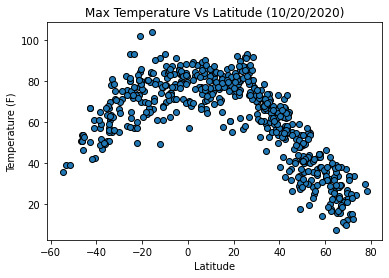

In [6]:
# Temperature Vs Latitude Scatter plot
latitude = weather_df['Latitude']
temperature = weather_df['Temperature']
plt.scatter(latitude,temperature, marker = 'o',edgecolors = 'black')

# Inserts plot formatting for the file
plt.title(f'Max Temperature Vs Latitude ({date})')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')

# Saves the fig as a png
plt.savefig("output/tempvslat.png")
plt.show()

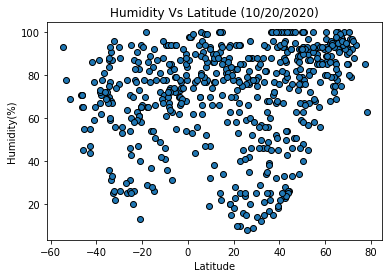

In [7]:
# Humidity (%) vs. Latitude
humidity = weather_df['Humidity']
plt.scatter(latitude,humidity, marker = 'o',edgecolors = 'black')

# Inserts plot formatting for the file
plt.title(f'Humidity Vs Latitude ({date})')
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')

# Saves the fig as a png
plt.savefig("output/humvslat.png")
plt.show()

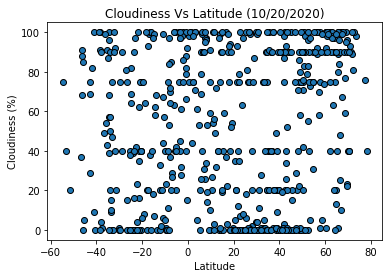

In [8]:
# Cloudiness (%) vs. Latitude
cloudiness = weather_df['Cloudiness']
plt.scatter(latitude,cloudiness, marker = 'o',edgecolors = 'black')

# Inserts plot formatting for the file
plt.title(f'Cloudiness Vs Latitude ({date})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Saves the fig as a png
plt.savefig("output/cloudvslat.png")
plt.show()

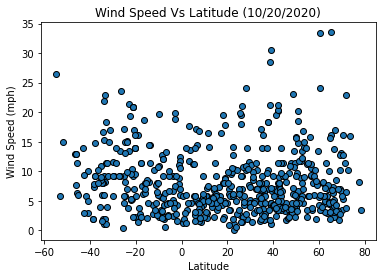

In [9]:
# Wind Speed (mph) vs. Latitude
wind = weather_df['Wind Speed']
plt.scatter(latitude,wind, marker = 'o',edgecolors = 'black')

# Inserts plot formatting for the file
plt.title(f'Wind Speed Vs Latitude ({date})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Saves the fig as a png
plt.savefig("output/windvslat.png")
plt.show()

In [10]:
# Splitting the data set into two hemispheres
weather_N_df = weather_df.loc[(weather_df['Latitude']>0)|(weather_df['Latitude'] == 0)]
weather_S_df = weather_df.loc[(weather_df['Latitude']<0)]

# Splitting the data used above into two groups
# Northern hemisphere lat >= 0
# Southern hemisphere lat < 0
lat_N = weather_N_df['Latitude']
lat_S = weather_S_df['Latitude']

temp_N = weather_N_df['Temperature']
temp_S = weather_S_df['Temperature']

humid_N = weather_N_df['Humidity']
humid_S = weather_S_df['Humidity']

cloud_N = weather_N_df['Cloudiness']
cloud_S = weather_S_df['Cloudiness']

winspd_N = weather_N_df['Wind Speed']
winspd_S = weather_S_df['Wind Speed']

# Uses the data above to complete regression analysis.

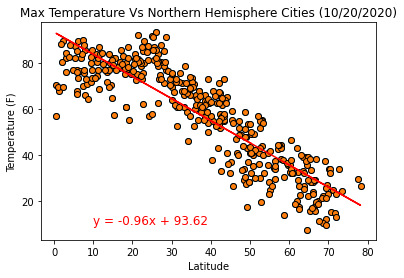

The correlation coefficient is -0.8788646108354425.


In [11]:
# Creating a regression line
x_values = lat_N
y_values = temp_N

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# This is used to find any regression value that exists
regress_values = x_values * slope + intercept

#Creates a line equation and places it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,10),fontsize=12,color="red")

# Formatting
plt.scatter(x_values,y_values, marker = 'o',edgecolors = 'black')
plt.title(f'Max Temperature Vs Northern Hemisphere Cities ({date})')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')

plt.savefig("output/ntempvslat.png")
plt.show()

# Prints the correlation coefficient(r) to understand the regression
print(f'The correlation coefficient is {rvalue}.')

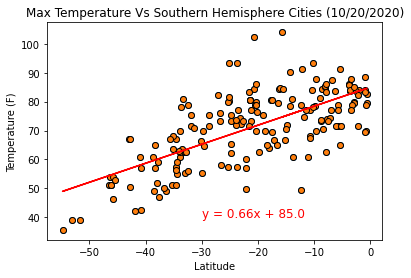

The correlation coefficient is 0.6905862171696099.


In [12]:
# Creating a regression line
x_values = lat_S
y_values = temp_S

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# This is used to find any regression value that exists
regress_values = x_values * slope + intercept

#Creates a line equation and places it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,40),fontsize=12,color="red")

# Formatting
plt.scatter(x_values,y_values, marker = 'o',edgecolors = 'black')
plt.title(f'Max Temperature Vs Southern Hemisphere Cities ({date})')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')

plt.savefig("output/stempvslat.png")
plt.show()

# Prints the correlation coefficient(r) to understand the regression
print(f'The correlation coefficient is {rvalue}.')

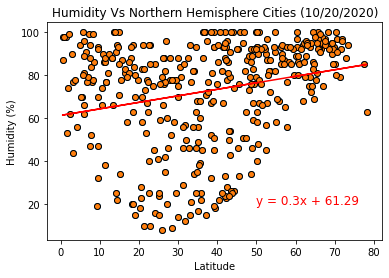

The correlation coefficient is 0.2462407562860375.


In [13]:
# Creating a regression line
x_values = lat_N
y_values = humid_N

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# This is used to find any regression value that exists
regress_values = x_values * slope + intercept

#Creates a line equation and places it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")

# Formatting
plt.scatter(x_values,y_values, marker = 'o',edgecolors = 'black')
plt.title(f'Humidity Vs Northern Hemisphere Cities ({date})')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

plt.savefig("output/nhumvslat.png")
plt.show()

# Prints the correlation coefficient(r) to understand the regression
print(f'The correlation coefficient is {rvalue}.')

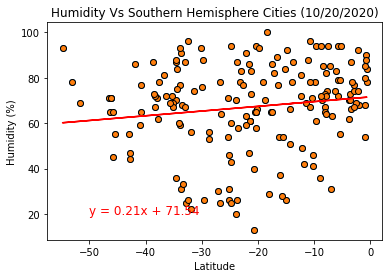

The correlation coefficient is 0.14477343071910573.


In [14]:
# Creating a regression line
x_values = lat_S
y_values = humid_S

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# This is used to find any regression value that exists
regress_values = x_values * slope + intercept

#Creates a line equation and places it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=12,color="red")

# Formatting
plt.scatter(x_values,y_values, marker = 'o',edgecolors = 'black')
plt.title(f'Humidity Vs Southern Hemisphere Cities ({date})')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

plt.savefig("output/shumvslat.png")
plt.show()

# Prints the correlation coefficient(r) to understand the regression
print(f'The correlation coefficient is {rvalue}.')

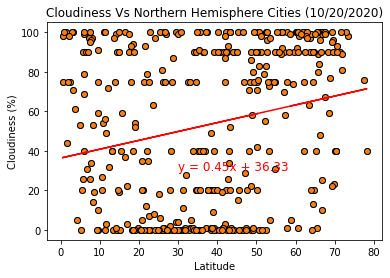

The correlation coefficient is 0.22319522063936673.


In [15]:
# Creating a regression line
x_values = lat_N
y_values = cloud_N

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# This is used to find any regression value that exists
regress_values = x_values * slope + intercept

#Creates a line equation and places it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,30),fontsize=12,color="red")

# Formatting
plt.scatter(x_values,y_values, marker = 'o',edgecolors = 'black')
plt.title(f'Cloudiness Vs Northern Hemisphere Cities ({date})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

plt.savefig("output/ncloudvslat.png")
plt.show()

# Prints the correlation coefficient(r) to understand the regression
print(f'The correlation coefficient is {rvalue}.')

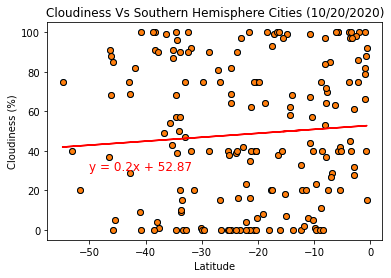

The correlation coefficient is 0.07515230738017287.


In [16]:
# Creating a regression line
x_values = lat_S
y_values = cloud_S

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# This is used to find any regression value that exists
regress_values = x_values * slope + intercept

#Creates a line equation and places it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,30),fontsize=12,color="red")

# Formatting
plt.scatter(x_values,y_values, marker = 'o',edgecolors = 'black')
plt.title(f'Cloudiness Vs Southern Hemisphere Cities ({date})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

plt.savefig("output/scloudvslat.png")
plt.show()

# Prints the correlation coefficient(r) to understand the regression
print(f'The correlation coefficient is {rvalue}.')

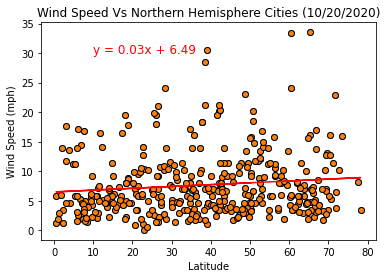

The correlation coefficient is 0.11458737797985148.


In [17]:
# Creating a regression line
x_values = lat_N
y_values = winspd_N

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# This is used to find any regression value that exists
regress_values = x_values * slope + intercept

#Creates a line equation and places it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,30),fontsize=12,color="red")

# Formatting
plt.scatter(x_values,y_values, marker = 'o',edgecolors = 'black')
plt.title(f'Wind Speed Vs Northern Hemisphere Cities ({date})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

plt.savefig("output/nwindvslat.png")
plt.show()

# Prints the correlation coefficient(r) to understand the regression
print(f'The correlation coefficient is {rvalue}.')

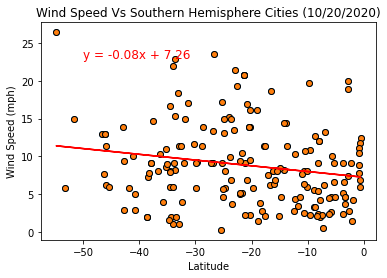

The correlation coefficient is -0.18887911627146253.


In [18]:
# Creating a regression line
x_values = lat_S
y_values = winspd_S

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# This is used to find any regression value that exists
regress_values = x_values * slope + intercept

#Creates a line equation and places it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,23),fontsize=12,color="red")

# Formatting
plt.scatter(x_values,y_values, marker = 'o',edgecolors = 'black')
plt.title(f'Wind Speed Vs Southern Hemisphere Cities ({date})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

plt.savefig("output/swindvslat.png")
plt.show()

# Prints the correlation coefficient(r) to understand the regression
print(f'The correlation coefficient is {rvalue}.')